In [2]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

init = [[1, 1, 1, 0, 0, 1, 1, 0, 1], [1, 0, 0, 1, 0, 1, 0, 0, 1],
[1, 1, 0, 0, 1, 0, 0, 0, 1], [0, 0, 0, 1, 0, 1, 0, 1, 1],
[1, 0, 0, 1, 0, 0, 0, 0, 0], [1, 1, 0, 1, 1, 0, 1, 1, 1],
[0, 0, 1, 0, 0, 0, 1, 1, 1], [1, 1, 0, 1, 0, 0, 0, 1, 0],
[0, 1, 0, 1, 0, 1, 0, 0, 0], [0, 1, 0, 1, 1, 0, 1, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0, 1], [0, 1, 0, 1, 1, 1, 0, 1, 1],
[1, 0, 1, 1, 1, 1, 1, 1, 0], [1, 1, 0, 0, 1, 0, 1, 0, 0],
[1, 0, 0, 1, 0, 1, 0, 0, 0], [1, 0, 0, 1, 1, 0, 0, 0, 1],
[0, 0, 1, 0, 0, 0, 1, 0, 1], [1, 0, 0, 1, 1, 0, 1, 0, 1],
[0, 0, 0, 0, 1, 0, 1, 1, 1], [1, 0, 0, 1, 1, 0, 0, 1, 0]]

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
### Binary Threshold function
def vector_threshold(x):
    return np.round(0.5 + 0.5*np.sign(x)).astype(int)

In [4]:
### Initialise the weight matrix with inhibition constant I
def initialise_weights(I):
    # Declare an empty array
    weight_matrix = np.empty([9, 9], dtype=float)
    # Fill the matrix with negative inhibition constants
    weight_matrix.fill(-I)
    # Set the weights by the Hebb Rule for the patterns we wish to store
    weight_matrix[np.ix_([1],[4,7])] = 1
    weight_matrix[np.ix_([4],[1,3,5,7])] = 1
    weight_matrix[np.ix_([7],[1,4])] = 1
    weight_matrix[np.ix_([3],[4,5])] = 1
    weight_matrix[np.ix_([5],[4,3])] = 1
    # Set all the elements on the leading diagonal to 0, since w_ii = 0 for all i in a Hopfield Network
    np.fill_diagonal(weight_matrix, 0)
    return weight_matrix


In [5]:
### Network energy function that calculates the total energy in the network for a given state
def energy(state):
    state = np.matrix(state)
    e = 0
    for i in range(weight_matrix.shape[0]):
        for j in range(weight_matrix.shape[1]):
            e += weight_matrix[i,j]*state[0,i]*state[0,j]
    return -0.5*e

In [6]:
### Peforms a synchronous update of the neuron weights
def scan_update(weight_matrix, state, iterations):
    state = np.matrix(state)
    for n in range(iterations):
        for i in range(9):
            previous_state = state
            update = vector_threshold(weight_matrix[i]*np.transpose(previous_state))
            state[0,i] = update
    return state

In [7]:
### Performs an asynchronous update of the neuron weights in sequential order
def async_update(weight_matrix, state, iterations):
    state = np.matrix(state)
    for n in range(iterations):
        u = np.random.randint(9)
        update = vector_threshold(weight_matrix[u]*np.transpose(state))
        state[0,u] = update
    return state

In [8]:
### Runs the Hopfield network
def hopfield(weight_matrix, state, method, iterations):
    return method(weight_matrix, state, iterations)

In [9]:
### Function that determines whether or not a given state is a fixed point of the network
def is_fixed_point(state):
    state = np.matrix(state)
    return (np.sum(state == np.transpose(vector_threshold(weight_matrix*np.transpose(state)))) == 9) == True

In [10]:
def get_fixed_points(states):
    fixed_points = []
    for s in states:
        if is_fixed_point(s):
            fixed_points.append(s)
    return fixed_points

In [11]:
### Q1
def experiment_1():
    binary_states = [list(i) for i in itertools.product([0, 1], repeat=9)]
    fixed_points = get_fixed_points(binary_states)
    # For each binary state, test if it is a fixed point of the network
    print 'Fixed Points of the Network: '
    for s in fixed_points:
        print s
    print ' '

In [12]:
### Q2
def get_neighbour_states(state):
    neighbours = []
    for i in range(9):
        state_copy = state[:]
        state_copy[i] = np.abs(state_copy[i]-1)
        neighbours.append(state_copy)
    return neighbours

In [13]:
def experiment_2():
    binary_states = [list(i) for i in itertools.product([0, 1], repeat=9)]
    fixed_points = get_fixed_points(binary_states)
    for s in fixed_points:
        neighbours = get_neighbour_states(s)
        print 'Energy of Fixed Point: ' + str(s) + ' = ' + str(energy(s))
        for n in neighbours:
            print 'Energy of Neighbour: ' + str(n) + ' = ' + str(energy(n))
        print ' '

In [14]:
def experiment_3_async():
    for ic in [0.5, 1]:
        print 'Inhibition Constant = ' + str(ic)
        weight_matrix = initialise_weights(ic)
        print "Asynchronous update:"
        for s in init:
            print str(s) + ': ' + str(hopfield(weight_matrix, np.matrix(s), async_update, 1000))

        fig = plt.figure(figsize=(9, 9))
        ax = fig.add_subplot(111)
        for s in init:
            test_state = s
            energy_seq = []
            iterations = 100
            for i in range(iterations):
                test_state = async_update(weight_matrix, test_state, 1)
                energy_seq.append(energy(test_state))

            x = range(iterations)
            ax.plot(x, energy_seq)
            ax.legend(['State {0}'.format(i) for i in range(len(init))])

        ax.set_xlabel('Iteration')
        ax.set_ylabel('Network Energy')
        ax.set_title('Network Energy against Iteration number for states in "init" (w = '+str(ic)+', async updating)')

        plt.show()

In [15]:
def experiment_3_scan():
    for ic in [0.5, 1]:
        print 'Inhibition Constant = ' + str(ic)
        weight_matrix = initialise_weights(ic)
        print "Scan update:"
        for s in init:
            print str(s) + ': ' + str(hopfield(weight_matrix, s, scan_update, 10))

        fig = plt.figure(figsize=(9, 9))
        ax = fig.add_subplot(111)
        for s in init:
            test_state = s
            energy_seq = []
            iterations = 10
            for i in range(iterations):
                test_state = scan_update(weight_matrix, test_state, 1)
                energy_seq.append(energy(test_state))

            x = range(iterations)
            ax.plot(x, energy_seq)
            ax.legend(['State {0}'.format(i) for i in range(len(init))])

        ax.set_xlabel('Iteration')
        ax.set_ylabel('Network Energy')
        ax.set_title('Network Energy against Iteration number for states in "init" (w = '+str(ic)+', scan updating)')

        plt.show()

In [16]:
weight_matrix = initialise_weights(1)

In [17]:
experiment_1()

Fixed Points of the Network: 
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 1, 1, 0, 0, 0]
[0, 1, 0, 0, 1, 0, 0, 1, 0]
 


In [18]:
experiment_2()

Energy of Fixed Point: [0, 0, 0, 0, 0, 0, 0, 0, 0] = -0.0
Energy of Neighbour: [1, 0, 0, 0, 0, 0, 0, 0, 0] = -0.0
Energy of Neighbour: [0, 1, 0, 0, 0, 0, 0, 0, 0] = -0.0
Energy of Neighbour: [0, 0, 1, 0, 0, 0, 0, 0, 0] = -0.0
Energy of Neighbour: [0, 0, 0, 1, 0, 0, 0, 0, 0] = -0.0
Energy of Neighbour: [0, 0, 0, 0, 1, 0, 0, 0, 0] = -0.0
Energy of Neighbour: [0, 0, 0, 0, 0, 1, 0, 0, 0] = -0.0
Energy of Neighbour: [0, 0, 0, 0, 0, 0, 1, 0, 0] = -0.0
Energy of Neighbour: [0, 0, 0, 0, 0, 0, 0, 1, 0] = -0.0
Energy of Neighbour: [0, 0, 0, 0, 0, 0, 0, 0, 1] = -0.0
 
Energy of Fixed Point: [0, 0, 0, 1, 1, 1, 0, 0, 0] = -3.0
Energy of Neighbour: [1, 0, 0, 1, 1, 1, 0, 0, 0] = -0.0
Energy of Neighbour: [0, 1, 0, 1, 1, 1, 0, 0, 0] = -2.0
Energy of Neighbour: [0, 0, 1, 1, 1, 1, 0, 0, 0] = -0.0
Energy of Neighbour: [0, 0, 0, 0, 1, 1, 0, 0, 0] = -1.0
Energy of Neighbour: [0, 0, 0, 1, 0, 1, 0, 0, 0] = -1.0
Energy of Neighbour: [0, 0, 0, 1, 1, 0, 0, 0, 0] = -1.0
Energy of Neighbour: [0, 0, 0, 1, 1, 1, 1,

In [19]:
weight_matrix = initialise_weights(0.5)

In [20]:
experiment_1()

Fixed Points of the Network: 
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 1, 1, 0, 0, 0]
[0, 1, 0, 0, 1, 0, 0, 1, 0]
[0, 1, 0, 1, 1, 1, 0, 1, 0]
 


In [21]:
experiment_2()

Energy of Fixed Point: [0, 0, 0, 0, 0, 0, 0, 0, 0] = -0.0
Energy of Neighbour: [1, 0, 0, 0, 0, 0, 0, 0, 0] = -0.0
Energy of Neighbour: [0, 1, 0, 0, 0, 0, 0, 0, 0] = -0.0
Energy of Neighbour: [0, 0, 1, 0, 0, 0, 0, 0, 0] = -0.0
Energy of Neighbour: [0, 0, 0, 1, 0, 0, 0, 0, 0] = -0.0
Energy of Neighbour: [0, 0, 0, 0, 1, 0, 0, 0, 0] = -0.0
Energy of Neighbour: [0, 0, 0, 0, 0, 1, 0, 0, 0] = -0.0
Energy of Neighbour: [0, 0, 0, 0, 0, 0, 1, 0, 0] = -0.0
Energy of Neighbour: [0, 0, 0, 0, 0, 0, 0, 1, 0] = -0.0
Energy of Neighbour: [0, 0, 0, 0, 0, 0, 0, 0, 1] = -0.0
 
Energy of Fixed Point: [0, 0, 0, 1, 1, 1, 0, 0, 0] = -3.0
Energy of Neighbour: [1, 0, 0, 1, 1, 1, 0, 0, 0] = -1.5
Energy of Neighbour: [0, 1, 0, 1, 1, 1, 0, 0, 0] = -3.0
Energy of Neighbour: [0, 0, 1, 1, 1, 1, 0, 0, 0] = -1.5
Energy of Neighbour: [0, 0, 0, 0, 1, 1, 0, 0, 0] = -1.0
Energy of Neighbour: [0, 0, 0, 1, 0, 1, 0, 0, 0] = -1.0
Energy of Neighbour: [0, 0, 0, 1, 1, 0, 0, 0, 0] = -1.0
Energy of Neighbour: [0, 0, 0, 1, 1, 1, 1,

Inhibition Constant = 0.5
Scan update:
[1, 1, 1, 0, 0, 1, 1, 0, 1]: [[0 0 0 0 0 0 0 0 0]]
[1, 0, 0, 1, 0, 1, 0, 0, 1]: [[0 0 0 1 1 1 0 0 0]]
[1, 1, 0, 0, 1, 0, 0, 0, 1]: [[0 1 0 0 1 0 0 1 0]]
[0, 0, 0, 1, 0, 1, 0, 1, 1]: [[0 1 0 0 1 0 0 1 0]]
[1, 0, 0, 1, 0, 0, 0, 0, 0]: [[0 0 0 0 0 0 0 0 0]]
[1, 1, 0, 1, 1, 0, 1, 1, 1]: [[0 1 0 0 1 0 0 1 0]]
[0, 0, 1, 0, 0, 0, 1, 1, 1]: [[0 0 0 0 0 0 0 0 0]]
[1, 1, 0, 1, 0, 0, 0, 1, 0]: [[0 1 0 0 1 0 0 1 0]]
[0, 1, 0, 1, 0, 1, 0, 0, 0]: [[0 0 0 1 1 1 0 0 0]]
[0, 1, 0, 1, 1, 0, 1, 0, 0]: [[0 0 0 1 1 1 0 0 0]]
[0, 0, 1, 0, 1, 0, 0, 0, 1]: [[0 0 0 1 1 1 0 0 0]]
[0, 1, 0, 1, 1, 1, 0, 1, 1]: [[0 1 0 1 1 1 0 1 0]]
[1, 0, 1, 1, 1, 1, 1, 1, 0]: [[0 0 0 1 1 1 0 0 0]]
[1, 1, 0, 0, 1, 0, 1, 0, 0]: [[0 1 0 0 1 0 0 1 0]]
[1, 0, 0, 1, 0, 1, 0, 0, 0]: [[0 0 0 1 1 1 0 0 0]]
[1, 0, 0, 1, 1, 0, 0, 0, 1]: [[0 0 0 1 1 1 0 0 0]]
[0, 0, 1, 0, 0, 0, 1, 0, 1]: [[0 0 0 0 0 0 0 0 0]]
[1, 0, 0, 1, 1, 0, 1, 0, 1]: [[0 0 0 0 0 0 0 0 0]]
[0, 0, 0, 0, 1, 0, 1, 1, 1]: [[0 1 0 0 1 0 

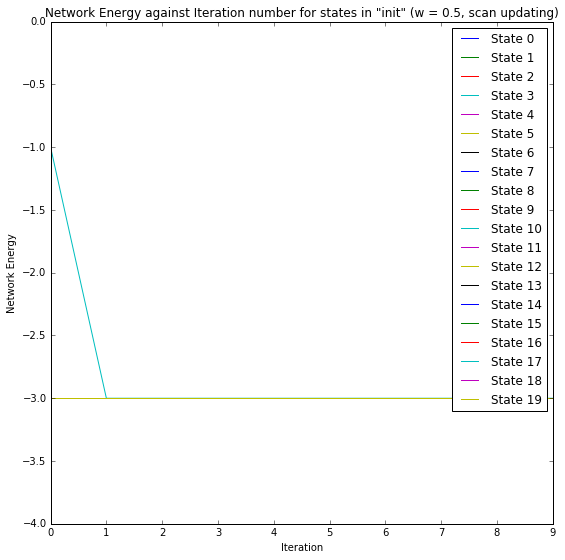

Inhibition Constant = 1
Scan update:
[1, 1, 1, 0, 0, 1, 1, 0, 1]: [[0 0 0 0 0 0 0 0 0]]
[1, 0, 0, 1, 0, 1, 0, 0, 1]: [[0 0 0 0 0 0 0 0 0]]
[1, 1, 0, 0, 1, 0, 0, 0, 1]: [[0 0 0 0 0 0 0 0 0]]
[0, 0, 0, 1, 0, 1, 0, 1, 1]: [[0 1 0 0 1 0 0 1 0]]
[1, 0, 0, 1, 0, 0, 0, 0, 0]: [[0 0 0 0 0 0 0 0 0]]
[1, 1, 0, 1, 1, 0, 1, 1, 1]: [[0 0 0 0 0 0 0 0 0]]
[0, 0, 1, 0, 0, 0, 1, 1, 1]: [[0 0 0 0 0 0 0 0 0]]
[1, 1, 0, 1, 0, 0, 0, 1, 0]: [[0 1 0 0 1 0 0 1 0]]
[0, 1, 0, 1, 0, 1, 0, 0, 0]: [[0 0 0 1 1 1 0 0 0]]
[0, 1, 0, 1, 1, 0, 1, 0, 0]: [[0 0 0 0 0 0 0 0 0]]
[0, 0, 1, 0, 1, 0, 0, 0, 1]: [[0 0 0 0 0 0 0 0 0]]
[0, 1, 0, 1, 1, 1, 0, 1, 1]: [[0 1 0 0 1 0 0 1 0]]
[1, 0, 1, 1, 1, 1, 1, 1, 0]: [[0 1 0 0 1 0 0 1 0]]
[1, 1, 0, 0, 1, 0, 1, 0, 0]: [[0 0 0 0 0 0 0 0 0]]
[1, 0, 0, 1, 0, 1, 0, 0, 0]: [[0 0 0 1 1 1 0 0 0]]
[1, 0, 0, 1, 1, 0, 0, 0, 1]: [[0 0 0 0 0 0 0 0 0]]
[0, 0, 1, 0, 0, 0, 1, 0, 1]: [[0 0 0 0 0 0 0 0 0]]
[1, 0, 0, 1, 1, 0, 1, 0, 1]: [[0 0 0 0 0 0 0 0 0]]
[0, 0, 0, 0, 1, 0, 1, 1, 1]: [[0 0 0 0 0 0 0 

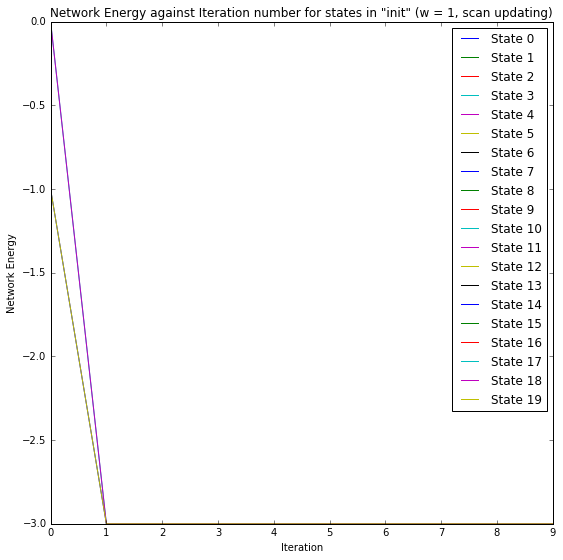

In [22]:
experiment_3_scan()

Inhibition Constant = 0.5
Asynchronous update:
[1, 1, 1, 0, 0, 1, 1, 0, 1]: [[0 0 0 0 0 0 0 0 0]]
[1, 0, 0, 1, 0, 1, 0, 0, 1]: [[0 0 0 1 1 1 0 0 0]]
[1, 1, 0, 0, 1, 0, 0, 0, 1]: [[0 0 0 1 1 1 0 0 0]]
[0, 0, 0, 1, 0, 1, 0, 1, 1]: [[0 1 0 1 1 1 0 1 0]]
[1, 0, 0, 1, 0, 0, 0, 0, 0]: [[0 0 0 0 0 0 0 0 0]]
[1, 1, 0, 1, 1, 0, 1, 1, 1]: [[0 1 0 1 1 1 0 1 0]]
[0, 0, 1, 0, 0, 0, 1, 1, 1]: [[0 0 0 0 0 0 0 0 0]]
[1, 1, 0, 1, 0, 0, 0, 1, 0]: [[0 1 0 1 1 1 0 1 0]]
[0, 1, 0, 1, 0, 1, 0, 0, 0]: [[0 0 0 1 1 1 0 0 0]]
[0, 1, 0, 1, 1, 0, 1, 0, 0]: [[0 1 0 1 1 1 0 1 0]]
[0, 0, 1, 0, 1, 0, 0, 0, 1]: [[0 0 0 1 1 1 0 0 0]]
[0, 1, 0, 1, 1, 1, 0, 1, 1]: [[0 1 0 1 1 1 0 1 0]]
[1, 0, 1, 1, 1, 1, 1, 1, 0]: [[0 1 0 1 1 1 0 1 0]]
[1, 1, 0, 0, 1, 0, 1, 0, 0]: [[0 0 0 1 1 1 0 0 0]]
[1, 0, 0, 1, 0, 1, 0, 0, 0]: [[0 0 0 1 1 1 0 0 0]]
[1, 0, 0, 1, 1, 0, 0, 0, 1]: [[0 0 0 1 1 1 0 0 0]]
[0, 0, 1, 0, 0, 0, 1, 0, 1]: [[0 0 0 0 0 0 0 0 0]]
[1, 0, 0, 1, 1, 0, 1, 0, 1]: [[0 0 0 1 1 1 0 0 0]]
[0, 0, 0, 0, 1, 0, 1, 1, 1]: [[0 1 

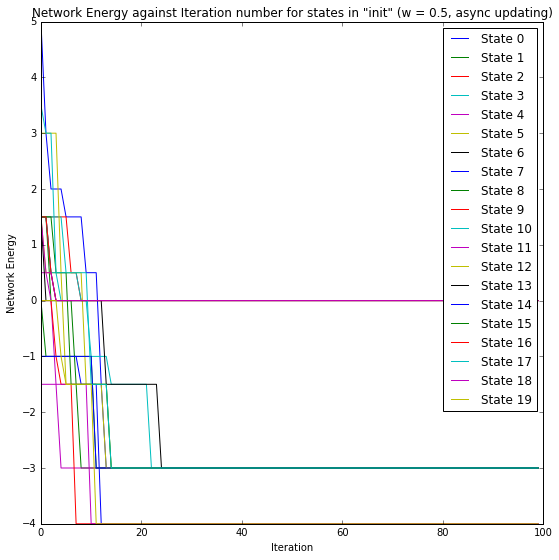

Inhibition Constant = 1
Asynchronous update:
[1, 1, 1, 0, 0, 1, 1, 0, 1]: [[0 0 0 0 0 0 0 0 0]]
[1, 0, 0, 1, 0, 1, 0, 0, 1]: [[0 0 0 1 1 1 0 0 0]]
[1, 1, 0, 0, 1, 0, 0, 0, 1]: [[0 1 0 0 1 0 0 1 0]]
[0, 0, 0, 1, 0, 1, 0, 1, 1]: [[0 1 0 0 1 0 0 1 0]]
[1, 0, 0, 1, 0, 0, 0, 0, 0]: [[0 0 0 0 0 0 0 0 0]]
[1, 1, 0, 1, 1, 0, 1, 1, 1]: [[0 1 0 0 1 0 0 1 0]]
[0, 0, 1, 0, 0, 0, 1, 1, 1]: [[0 0 0 0 0 0 0 0 0]]
[1, 1, 0, 1, 0, 0, 0, 1, 0]: [[0 0 0 1 1 1 0 0 0]]
[0, 1, 0, 1, 0, 1, 0, 0, 0]: [[0 1 0 0 1 0 0 1 0]]
[0, 1, 0, 1, 1, 0, 1, 0, 0]: [[0 0 0 1 1 1 0 0 0]]
[0, 0, 1, 0, 1, 0, 0, 0, 1]: [[0 0 0 0 0 0 0 0 0]]
[0, 1, 0, 1, 1, 1, 0, 1, 1]: [[0 0 0 1 1 1 0 0 0]]
[1, 0, 1, 1, 1, 1, 1, 1, 0]: [[0 0 0 1 1 1 0 0 0]]
[1, 1, 0, 0, 1, 0, 1, 0, 0]: [[0 1 0 0 1 0 0 1 0]]
[1, 0, 0, 1, 0, 1, 0, 0, 0]: [[0 0 0 0 0 0 0 0 0]]
[1, 0, 0, 1, 1, 0, 0, 0, 1]: [[0 0 0 0 0 0 0 0 0]]
[0, 0, 1, 0, 0, 0, 1, 0, 1]: [[0 0 0 0 0 0 0 0 0]]
[1, 0, 0, 1, 1, 0, 1, 0, 1]: [[0 0 0 0 0 0 0 0 0]]
[0, 0, 0, 0, 1, 0, 1, 1, 1]: [[0 0 0 

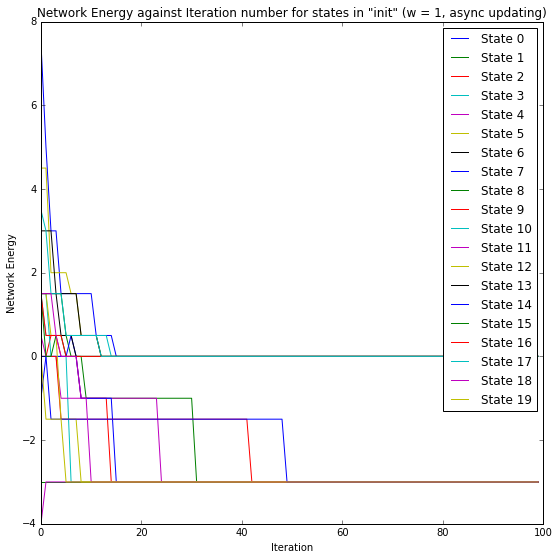

In [24]:
experiment_3_async()